# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team 3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
# Setting global constants to ensure no
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# Importing the Datasets

train_df = pd.read_csv('df_train.csv') # load the train data
test_df = pd.read_csv('df_test.csv') # load the train data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# Overviewing the train data set

train_df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333


In [4]:
# Displaying the dataset dimensions

train_df.shape

(8763, 49)

In [5]:
# Displaying all the feature names

print(train_df.columns)

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

- It can be observed from the shape of the dataset that there are 49 features and 8763 rows/observations.
- Since there are some hidden features, a list of all the features of the dataset can be viewed above

In [6]:
# Displaying information of the Train Dataframe

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

- There are 46 numeric data types present, of which there are 45 floats and 1 integer data type
- There are 3 non-numeric data types which are indicated by the term 'object'.
- Features such as time, Valencia_wind_deg and Seville_pressure with have non-numeric data types

In [7]:
# Displaying the total number of Null Values per feature

train_df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- The majority of the features have no missing values except for the Valencia_pressure feature that has a total of 2068 missing values.
- These missing values will be later dealt with by replacing these values with the mean or median in the data engineering section of the notebook

In [8]:
# Look at data statistics

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


- Mean values of some features such as Valencia_snow_3h, Barcelona_pressure, Bilbao_snow_3h, etc. are large and they are far apart from the range, minimum and maximum values.
- The maximum values infer that there might be some outliers in the data.

### Examining Outliers

### Kurtosis

* Kurtosis is a statistical measure used to describe the degree to which scores cluster in the tails or the peak of a frequency distribution
* We are looking for scores of < -3 or 3 < . These will indicate outlier presence

In [9]:
train_df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Features with large number of outliers are as follows:
- Bilbao_rain_1h
- Valencia_wind_speed
- Bilbao_wind_speed
- Barcelona_rain_1h
- Seville_rain_1h 
- Bilbao_snow_3h
- Barcelona_pressure
- Seville_rain_3h
- Madrid_rain_1h
- Barcelona_rain_3h
- Valencia_snow_3h
- Madrid_weather_id
- Barcelona_weather_id
- Seville_weather_id

Features with the most outliers were Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h and Valencia_snow_3h.

These features with the most outliers will be visualized next.

### Visualizing features with the most outliers

<AxesSubplot:xlabel='Barcelona_rain_1h'>

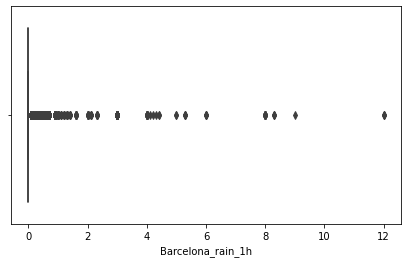

In [10]:
# Have a look at feature distributions

# Boxplot displaying outliers in Barcelona rainfall in 1 hour Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Barcelona_rain_1h', data=train_df)

<AxesSubplot:xlabel='Seville_rain_1h'>

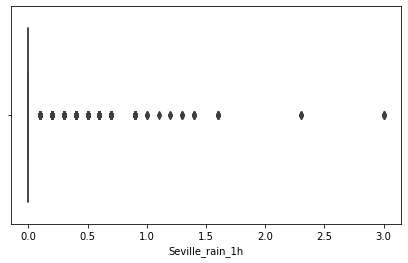

In [11]:
# Boxplot displaying outliers in Seville rainfall in 1 hour Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Seville_rain_1h', data=train_df)

<AxesSubplot:xlabel='Bilbao_snow_3h'>

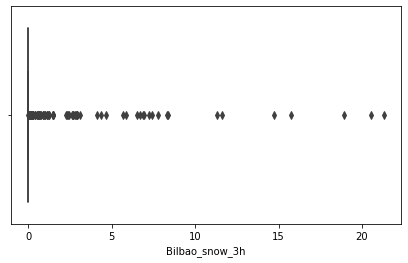

In [12]:
# Boxplot displaying outliers in Bilbao Snowfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Bilbao_snow_3h', data=train_df)

<AxesSubplot:xlabel='Barcelona_pressure'>

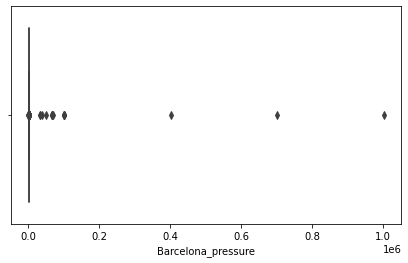

In [13]:
# Boxplot displaying outliers in the Barcelona Pressure

plt.figure(figsize = [7,4])
sns.boxplot(x='Barcelona_pressure', data=train_df)

<AxesSubplot:xlabel='Seville_rain_3h'>

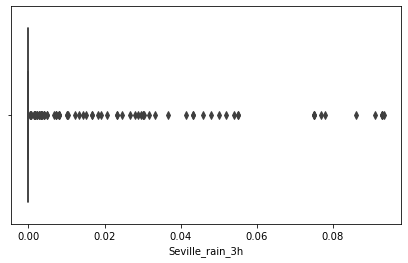

In [14]:
# Boxplot displaying outliers in Seville rainfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Seville_rain_3h', data=train_df)

<AxesSubplot:xlabel='Madrid_rain_1h'>

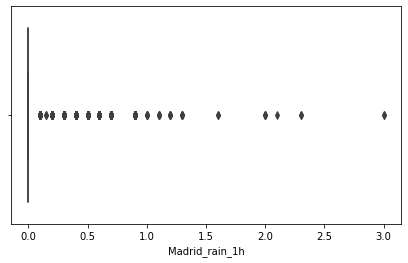

In [15]:
# Boxplot displaying outliers in Madrid rainfall in 1 hour Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Madrid_rain_1h', data=train_df)

<AxesSubplot:xlabel='Barcelona_rain_3h'>

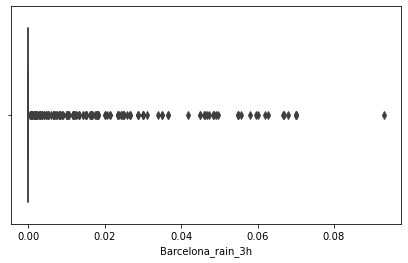

In [16]:
# Boxplot displaying outliers in Barcelona rainfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Barcelona_rain_3h', data=train_df)

<AxesSubplot:xlabel='Valencia_snow_3h'>

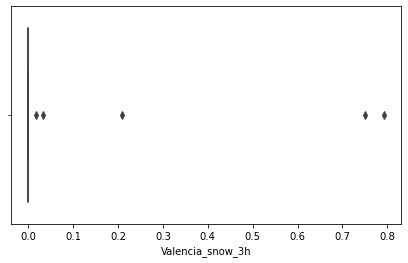

In [17]:
# Boxplot displaying outliers in Valencia Snowfall in 3 hours Time Frame

plt.figure(figsize = [7,4])
sns.boxplot(x='Valencia_snow_3h', data=train_df)

### Skewness

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.

In [18]:
train_df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

Features with large positive skewness:
- Bilbao_rain_1h
- Valencia_wind_speed
- Madrid_wind_speed
- Bilbao_wind_speed
- Seville_clouds_all
- Barcelona_wind_speed
- Madrid_clouds_all
- Seville_wind_speed
- Barcelona_rain_1h
- Seville_rain_1h
- Bilbao_snow_3h
- Barcelona_pressure
- Seville_rain_3h
- Madrid_rain_1h
- Barcelona_rain_3h
- Valencia_snow_3h

Features with large negative skewness:
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Bilbao_weather_id

It must be made aware that most of these features contain many outliers

Text(0.5, 1.0, 'Correlation Heatmap')

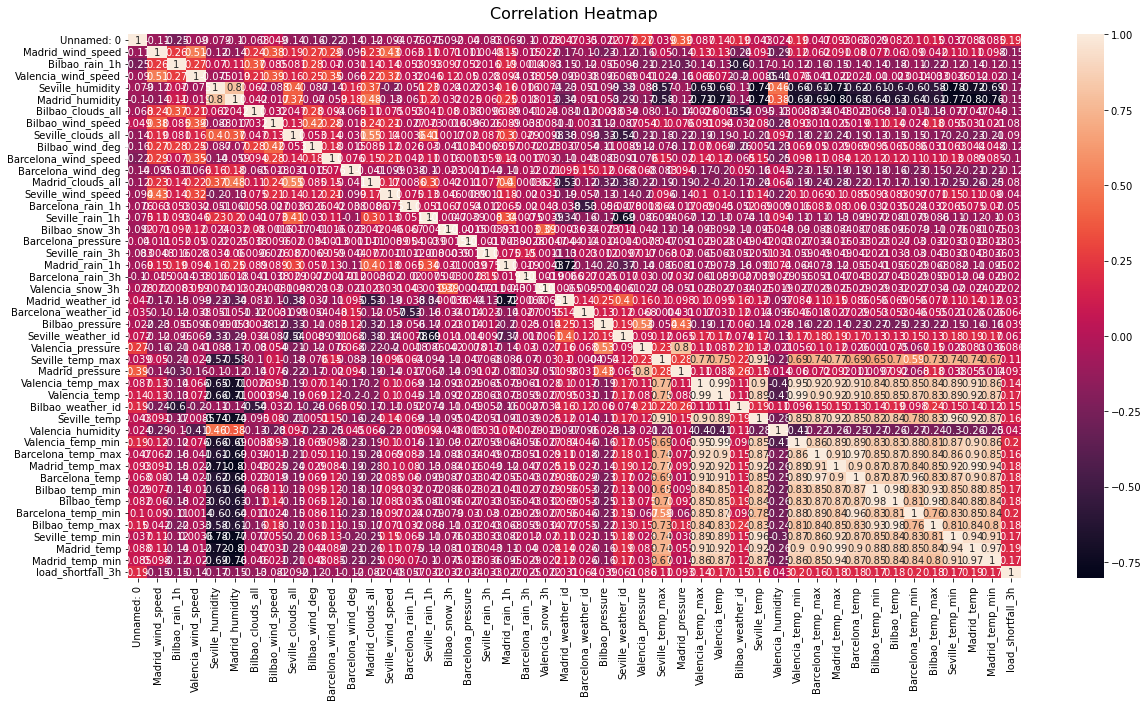

In [19]:
# Evaluate correlation

# Diplaying the correlations between features

corr_pairs = train_df.corr()

plt.figure(figsize=[20,10])
heatmap = sns.heatmap(train_df.corr(), annot=True )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16)

In [20]:
# Displaying the correlation values of each feature

train_df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


There is a presence of high correlation between some features, this means that there is Multicollinearity in our data. This will cause an overfitting problem in our linear regression model

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

 We'll treat our train data and test data differently for all missing or incorrectly stored values

## Feature Engineering - Training Data

In [21]:
# Creating a copy of the train dataset

train_dff = train_df.copy()

### Treatment of Missing Values

In [22]:
# Imputing missing values with the Median

train_dff['Valencia_pressure'].fillna(train_dff['Valencia_pressure'].median(), inplace = True)

In [23]:
# Checking if all missing values have been removed

train_dff['Valencia_pressure'].isnull().sum()

0

The only feature that had missing values was the 'Valencia_pressure' feature and all the missing values in that column have been imputed with the Median value of the column.

### Data Type Conversion

In [24]:
# Converting our 'Valencia_wind_deg' and 'Seville_pressure' features from categorical data types to numerical data types

# The first step is to strip away the string characters from the values

train_dff['Valencia_wind_deg'] = train_dff['Valencia_wind_deg'].str.extract('(\d+)')
train_dff['Seville_pressure'] = train_dff['Seville_pressure'].str.extract('(\d+)')

In [25]:
# The values' data type need to be converted to numeric, the pandas function 'to_numeric' will convert each data type

train_dff['Valencia_wind_deg'] = pd.to_numeric(train_dff['Valencia_wind_deg'])
train_dff['Seville_pressure'] = pd.to_numeric(train_dff['Seville_pressure'])

In [26]:
# Sanity check
# Checking if all columns features are numerical data types

train_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   int64  
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

The conversion of each categorical data type to a numeric data type is successful as all features in the dataset now contain numeric data types.

### Manipulating Features

The time column needs to be broken into smaller various date/time formats.

The following are the date/time sub-features that will be created:
- Year
- Month
- Week
- Day
- Hour

In [27]:
# Create new features

# Splitting the time feature into smaller sub-features

train_dff['Year'] = train_dff['time'].astype('datetime64').dt.year
train_dff['Month'] = train_dff['time'].astype('datetime64').dt.month
train_dff['Week'] = train_dff['time'].astype('datetime64').dt.isocalendar().week
train_dff['Day'] = train_dff['time'].astype('datetime64').dt.day
train_dff['Hour'] = train_dff['time'].astype('datetime64').dt.hour

In [28]:
#Sanity Check
train_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   int64  
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [29]:
 train_new = train_dff.drop(columns=['Unnamed: 0','time'])

In [30]:
#Sanity check
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int64  
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [31]:
# Re-defining the Independant and Output Variables
# 'nlm' here means 'not linear model'

x_df = train_new.copy()
x_nlm = x_df.drop(columns=['load_shortfall_3h'])

y_nlm = train_new['load_shortfall_3h'].astype('int')

In [32]:
x_nlm.shape

(8763, 51)

##  Training Data for Linear Regression

Linear regressors don't perform well with multicollinearity. The following section demonstrates our approach to manipulating the data into a form that is appropriate for a linear regression model.

As seen in the previous section, there is multicollinearity in our new time columns so we shall drop one of the columns, alongside unnecessary columns like 'Unnamed: 0' and 'time'.

<AxesSubplot:>

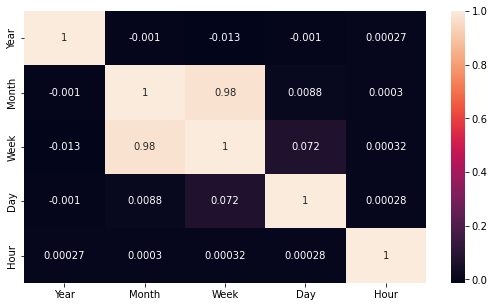

In [33]:
# Displaying the correlation between each new feature

time_df = train_dff.iloc[:,[-5,-4,-3,-2,-1]]
time_corr = time_df.corr()
plt.figure(figsize=[9,5])
sns.heatmap(time_corr, annot=True)

There is a presence of high Multicollinearity with the newly created sub-features. The features involved that gave high correlation are:
- Month
- Week

In [34]:
# Dropping features/columns that are not needed

train_lm_dff = train_dff.drop(columns=['Unnamed: 0','time','Week'])

<AxesSubplot:>

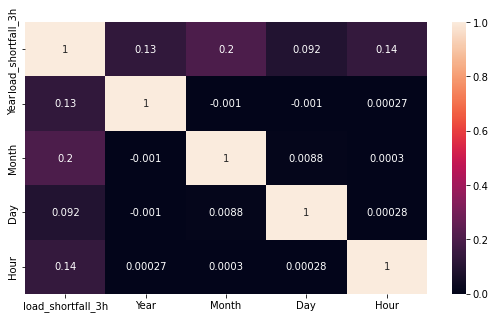

In [35]:
# Displaying the correlation between each new feature

time_dff = train_lm_dff.iloc[:,[-5,-4,-3,-2,-1]]
time_corrr = time_dff.corr()
plt.figure(figsize=[9,5])
sns.heatmap(time_corrr,annot=True )

With the highly correlated features and unnecassary features dropped, it can be shown that the Multicollinearity issue has been dealt with in the above Correlation Heatmap.

Text(0.5, 1.0, 'Correlation Heatmap')

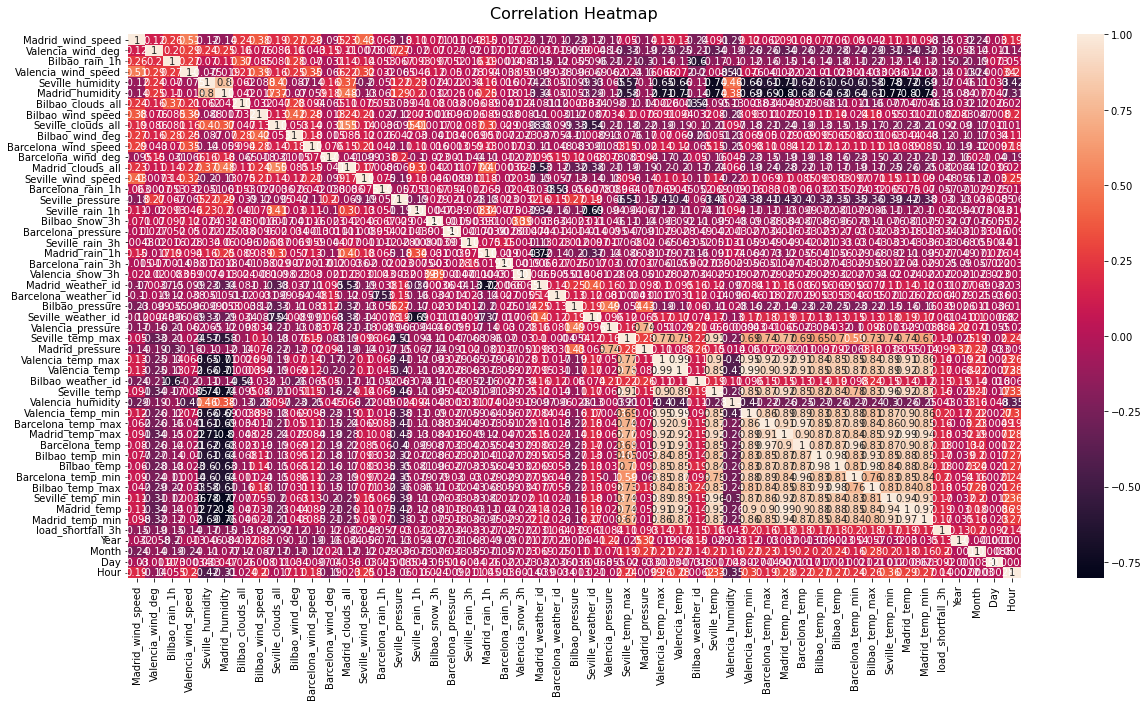

In [36]:
# Diplaying the correlations between each feature

corrr_pairs = train_lm_dff.corr()

plt.figure(figsize=[20,10])
heatmap = sns.heatmap(corrr_pairs, annot=True )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16)

Looking at the above correlation heatmap, it is shown that there is still high Multicollinearity present in the dataset as some of the features have high correlation between each other.
The features are as follows:
- Valencia_temp_max
- Valencia_temp
- Seville_temp
- Valencia_temp_min
- Barcelona_temp_max
- Madrid_temp_max
- Barcelona_temp
- Bilbao_temp_min
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max
- Seville_temp_min
- Madrid_temp
- Madrid_temp_min
- load_shortfall_3h

Therefore these features will have to be dropped from the dataset to improve the Multicollinearity issue

In [37]:
# Engineer existing features

# Dropping unnecassary features

lm_x = train_lm_dff.drop(columns=['Valencia_temp_max',
                                        'Valencia_temp',
                                        'Seville_temp',
                                        'Valencia_temp_min',
                                        'Barcelona_temp_max',
                                        'Madrid_temp_max',
                                        'Barcelona_temp',
                                        'Bilbao_temp_min',
                                        'Bilbao_temp',
                                        'Barcelona_temp_min',
                                        'Bilbao_temp_max',
                                        'Seville_temp_min',
                                        'Madrid_temp',
                                        'Madrid_temp_min',
                                  'load_shortfall_3h'])

lm_name = train_lm_dff['load_shortfall_3h'].astype('int')

train_dfff = train_lm_dff.drop(columns=['Valencia_temp_max',
                                            'Valencia_temp',
                                            'Seville_temp',
                                            'Valencia_temp_min',
                                            'Barcelona_temp_max',
                                            'Madrid_temp_max',
                                            'Barcelona_temp',
                                            'Bilbao_temp_min',
                                            'Bilbao_temp',
                                            'Barcelona_temp_min',
                                            'Bilbao_temp_max',
                                            'Seville_temp_min',
                                            'Madrid_temp',
                                            'Madrid_temp_min'])

Text(0.5, 1.0, 'Correlation Heatmap')

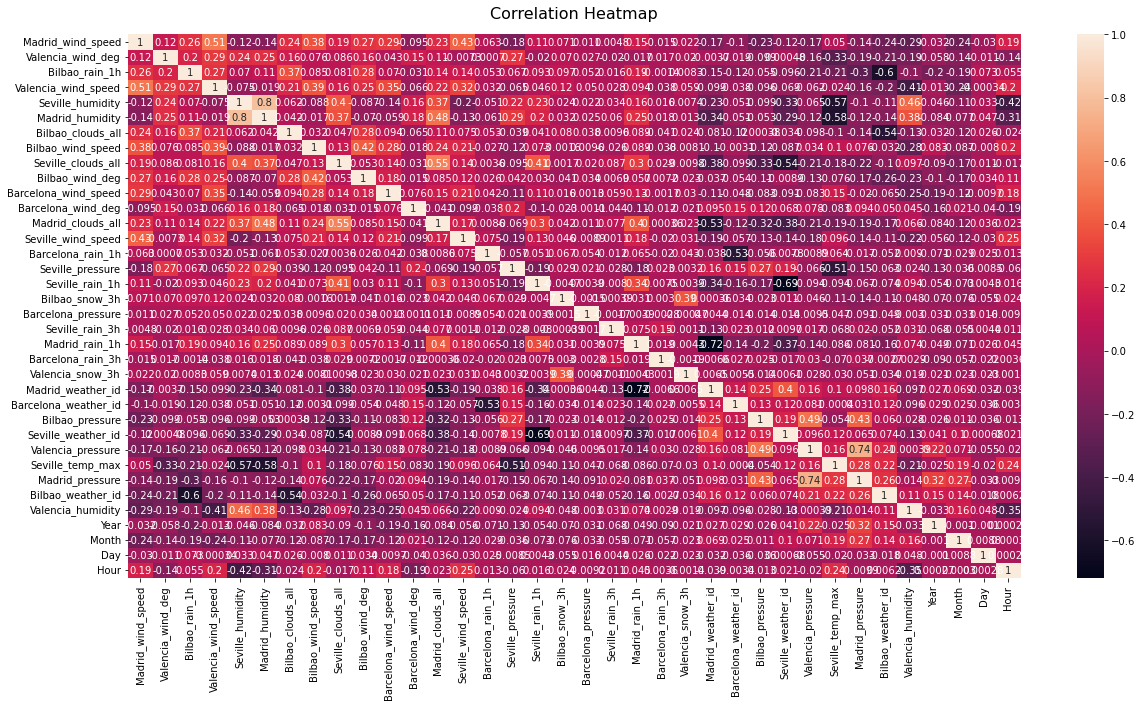

In [38]:
# Evaluate correlation
# Diplaying the correlations between features

dropped_corr_pairs = lm_x.corr()

plt.figure(figsize=[20,10])
heatmap = sns.heatmap(dropped_corr_pairs, annot=True )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16)

After creating a copy of the dataset and removing the necassary features from the copied dataset, it can be shown that the Multicollinearity issue has been dealt with.
The features were then later split into X and Y features for the modelling stage.

### Feature Selection

In [39]:
# Creating Dummy Variables

df_dummies = pd.get_dummies(train_dfff, drop_first=True)

df_dummies.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Valencia_pressure,Seville_temp_max,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,load_shortfall_3h,Year,Month,Day,Hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,1002.666667,274.254667,971.333333,800.0,75.666667,6715.666667,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,1004.333333,274.945000,972.666667,800.0,71.000000,4171.666667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,1005.333333,278.792000,974.000000,800.0,65.666667,4274.666667,2015,1,1,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,1009.000000,285.394000,994.666667,800.0,54.000000,5075.666667,2015,1,1,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,1015.000000,285.513719,1035.333333,800.0,58.333333,6620.666667,2015,1,1,15


In [40]:
# Calculating correlations between predictor variables and the response variable

dum_corr = df_dummies.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [41]:
# Build a dictionary of correlation coefficients and p-values

cor_pv = {}

column_titles = [col for col in dum_corr.index if col!= 'load_shortfall_3h']

for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['load_shortfall_3h'])[1],6)
    cor_pv[col] = {'Correlation_Coefficient':dum_corr[col],
                    'P_Value':p_val}
    
cor_pv_df = pd.DataFrame(cor_pv).T

cor_pv_df_sorted = cor_pv_df.sort_values('P_Value')
cor_pv_df_sorted[cor_pv_df_sorted['P_Value'] < 0.1]

,Correlation_Coefficient,P_Value
Month,0.199048,0.000000
Bilbao_rain_1h,-0.152510,0.000000
Madrid_wind_speed,-0.150981,0.000000
Madrid_humidity,-0.150536,0.000000
Valencia_wind_speed,-0.142791,0.000000
Bilbao_clouds_all,-0.127293,0.000000
Bilbao_wind_deg,-0.120800,0.000000
Barcelona_wind_deg,-0.116133,0.000000
Barcelona_wind_speed,-0.103633,0.000000
Seville_clouds_all,-0.091804,0.000000


Using a use a logic test with a significance value of 5% (p-value < 0.05), we could infer that all the present features are statistically significant.
Variables that have a significant correlation with the dependent variable will be kept.

In [42]:
# Creating and storing the Independant and Output Variables

X_name = list(cor_pv_df[cor_pv_df['P_Value'] < 0.05].index)
Y_name = 'load_shortfall_3h'

X_data = df_dummies[X_name]
Y_data = df_dummies[Y_name]

Independant Variable pairs which have a high correlation with each other need to be checked and removed to avoid autocorrelation and reduce Multicollinearity

In [43]:
# Creating the correlation matrix and keeping rows and columns that have correlation coefficients between 0.7 and -0.7

X_data_corr = X_data.corr()

X_data_corr[np.abs(X_data_corr) > 0.7]

,Month,Bilbao_weather_id,Hour,Year,Seville_temp_max,Madrid_pressure,Day,Valencia_pressure,Barcelona_weather_id,Seville_weather_id,...,Barcelona_wind_speed,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Valencia_wind_speed,Madrid_humidity,Madrid_wind_speed,Bilbao_rain_1h,Seville_humidity,Valencia_wind_deg
Month,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_weather_id,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_temp_max,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_pressure,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.740813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_pressure,NaN,NaN,NaN,NaN,NaN,0.740813,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_weather_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_weather_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Madrid_pressure' and 'Valencia_presssure'  are highly correlated, therefore one of these variables need to be dropped.
'Valencia_pressure' will be dropped as it has a lower correlation to the Output Variable 'load_shortfall_3h' than 'Madrid Pressure'

In [44]:
# Re-defining the Independant and Output Variables

X_name_df = train_dfff
X_name_dff = X_name_df.drop(columns=['load_shortfall_3h'])

Y_name_dff = dropped_train_dff['load_shortfall_3h'].astype('int')

NameError: name 'dropped_train_dff' is not defined

In [ ]:
# Displaying all the Independant Features that have a relationship with Output Variable

X_name_dff.columns

In [ ]:
# Displaying the Output Variables

Y_name_dff.head()

In [ ]:
# Displaying the shape of the data

X_name_dff.shape

We now have 36 columns and 8763 rows. We have 36 independant variables that can be used to build a relationship on the output variable 'load_shortfall_3h'

### Feature Scaling

The ranges of the features in the dataset need to be normalised. Some of these features are varying in degrees of magnitude , range and units.
Standard Scaling will be performed because it is robust to outliers.

In [ ]:
# Create standardization object

scaler = StandardScaler()

# Save standardized features into a new variable

# Fit transform method was used to fit the Standard Scaler to the data and also transform the data

normalized_features = scaler.fit_transform(X_name_dff)
normalized_features = pd.DataFrame(normalized_features, columns = X_name_dff.columns)

normalized_features.head()

The Independant Variables are now normalised and can be used in modelling stage.

## Treating Test Data

We will treat the test dataset for missin Valencia pressure values and get all data types to be numeric. We will then break down the time datatype. Similar to what we did to the training data

In [ ]:
# Creating a copy of the train dataset

test_dff = test_df.copy()

### Treatment of Missing Values

In [ ]:
# Imputing missing values with the Median

test_dff['Valencia_pressure'].fillna(test_dff['Valencia_pressure'].median(), inplace = True)

In [ ]:
# Checking if all missing values have been removed

test_dff['Valencia_pressure'].isnull().sum()

In [ ]:
# Converting our 'Valencia_wind_deg' and 'Seville_pressure' features from categorical data types to numerical data types

# The first step is to strip away the string characters from the values

test_dff['Valencia_wind_deg'] = test_dff['Valencia_wind_deg'].str.extract('(\d+)')
test_dff['Seville_pressure'] = test_dff['Seville_pressure'].str.extract('(\d+)')

In [ ]:
# The values' data type need to be converted to numeric, the pandas function 'to_numeric' will convert each data type

test_dff['Valencia_wind_deg'] = pd.to_numeric(test_dff['Valencia_wind_deg'])
test_dff['Seville_pressure'] = pd.to_numeric(test_dff['Seville_pressure'])

In [ ]:
# Sanity check
# Checking if all columns features are numerical data types

test_dff.info()

### Converting Time feature

In [ ]:
# Create new features

# Splitting the time feature into smaller sub-features

test_dff['Year'] = test_dff['time'].astype('datetime64').dt.year
test_dff['Month'] = test_dff['time'].astype('datetime64').dt.month
test_dff['Week'] = test_dff['time'].astype('datetime64').dt.isocalendar().week
test_dff['Day'] = test_dff['time'].astype('datetime64').dt.day
test_dff['Hour'] = test_dff['time'].astype('datetime64').dt.hour

In [ ]:
# Dropping features/columns that are not needed

test_clean = test_dff.drop(columns=['Unnamed: 0','time'])

In [ ]:
test_clean.info()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Target and Features for Linear Regression

In [92]:
# create targets and features dataset
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X_name_dff, Y_name_dff, test_size=0.2)
print('Training predictor:', X_lm_train.shape)
print('Training target:', y_lm_train.shape)
print('Testing predictor:', X_lm_test.shape)
print('Testing target:', y_lm_test.shape)

Training predictor: (7010, 36)
Training target: (7010,)
Testing predictor: (1753, 36)
Testing target: (1753,)


## Target and Features for all other models

In [113]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(x_nlm, y_nlm, test_size=0.2)
## Splitting our data into dependent Variable and Independent Variable
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (7010, 51)
Training target: (7010,)
Testing predictor: (1753, 51)
Testing target: (1753,)


In [91]:
# create one or more ML models
#Instantiate the model
#Instantiate the model
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_lm_train, y_lm_train)

#predict on unseen data
predict = lm.predict(X_lm_test)

In [131]:
# Instantiate regression tree model
Reg_tree = DecisionTreeRegressor()
# Fitting the model
Reg_tree.fit(X_train,y_train)
#predicting on on unseen data
Tree_pred = Reg_tree.predict(X_test)

In [114]:
# Our forest consists of 1500 trees with a max depth of 25 
RF = RandomForestRegressor(n_estimators=1500, max_depth=25)
# Fitting the model
RF.fit(X_train,y_train)
#predicting on on unseen data
RF_predict = RF.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [115]:
#Comparing the True value and the Predicted Value of our models
#This is a high level view to see how close our models are coming to predict the correct value

Linear = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predict})
Decision_Tree = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': Tree_pred})
Random_Forest = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': RF_predict})

print(Linear.head()) #Linear Model 
print("\n")
print(Decision_Tree.head()) #Decision Tree results
print("\n")
print(Random_Forest.head()) # Random Forest results

      Actual Value  Predicted Value
6710          4355     12167.959846
1792          6319     12532.228550
7875         15063     11585.576291
2882          5646      8582.725980
3629          2763     13790.818131


      Actual Value  Predicted Value
6710          4355           -518.0
1792          6319          20450.0
7875         15063          20047.0
2882          5646           2623.0
3629          2763          10368.0


      Actual Value  Predicted Value
6710          4355      5811.542539
1792          6319      9198.737866
7875         15063     12879.682402
2882          5646     11466.492041
3629          2763      4907.380345


In [120]:
# Compare model performance
RMSE = { 
    
                      'RMSE Score':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
RMSE_Score = pd.DataFrame(data=RMSE)
RMSE_Score

,RMSE Score
Decision Tree,7392.020978
Linear model,5577.792756
Random Forest,2981.052737


In [118]:
R_squared= { 
    
                      'R**2 Score':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
R_squared_score = pd.DataFrame(data=R_squared)
R_squared_score

,R**2 Score
Decision Tree,-0.964040
Linear model,-0.118275
Random Forest,0.680579


In [119]:
Test_MSE = { 
    
                      'MSE Score':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Test_MSE_score = pd.DataFrame(data=Test_MSE)
Test_MSE_score

,MSE Score
Decision Tree,5.464197e+07
Linear model,3.111177e+07
Random Forest,8.886675e+06


### Choose best model and motivate why it is the best choice

* According to the RMSE value, the random forest is our best choice.
* In our training and test data, we have a few columns with outlier values.
* A random forest is robust to such values and can be trained even on such data
* The random forest also has the best r-squared value which means it will reliably predict better than the other two algorithms we used.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

* A random forest algorithm can be explained and understood better by way of analogy

* Imagine you want to buy real estate, and you want to figure out what comprises a good deal so that you don’t get taken advantage of.

* The obvious thing to do would be to look at historic prices of houses sold in the area, then create some kind of decision criteria to summarize the average selling prices given the real-estate specification.

* You can use the decision chart to evaluate whether the listed price for the apartment you are considering is a bargain or not. 

It could look like this:



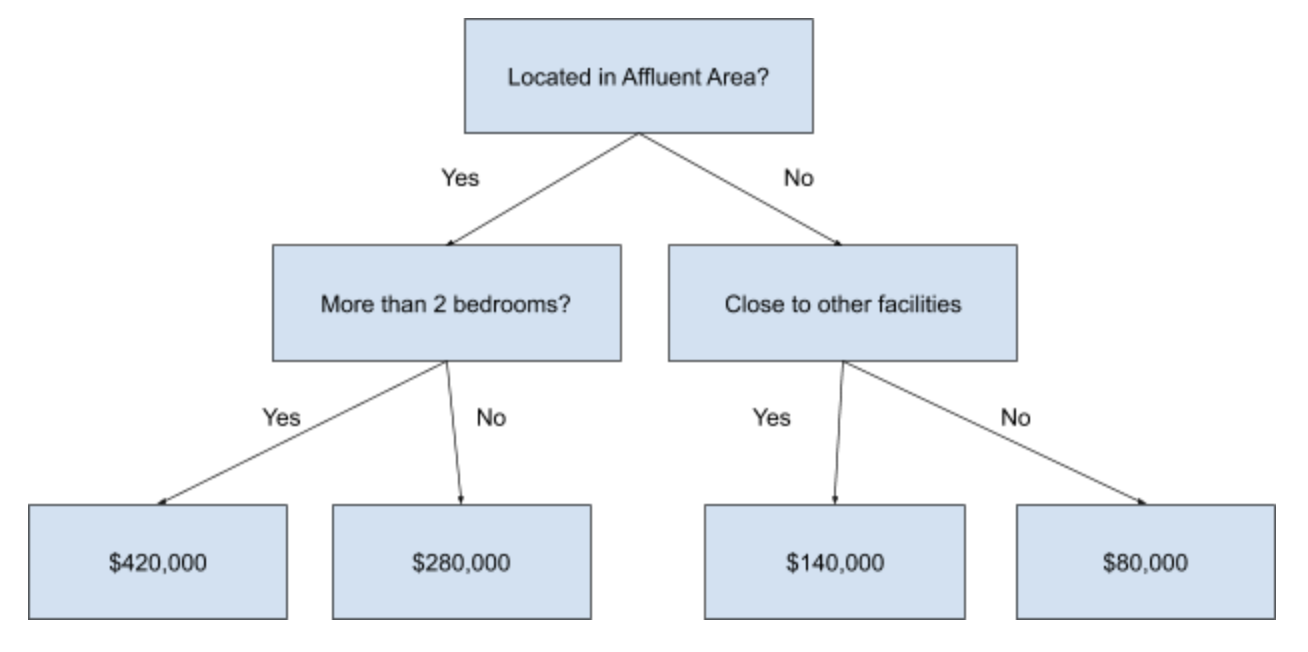



* The chart represents a decision tree through a series of yes/no questions, which lead you from the real-estate description (“3 bedrooms”) to its historic average price.

* You can use the decision tree to predict what the expected price of a real estate would be, given its attributes.



However, you could come up with a distinctly different decision tree structure:


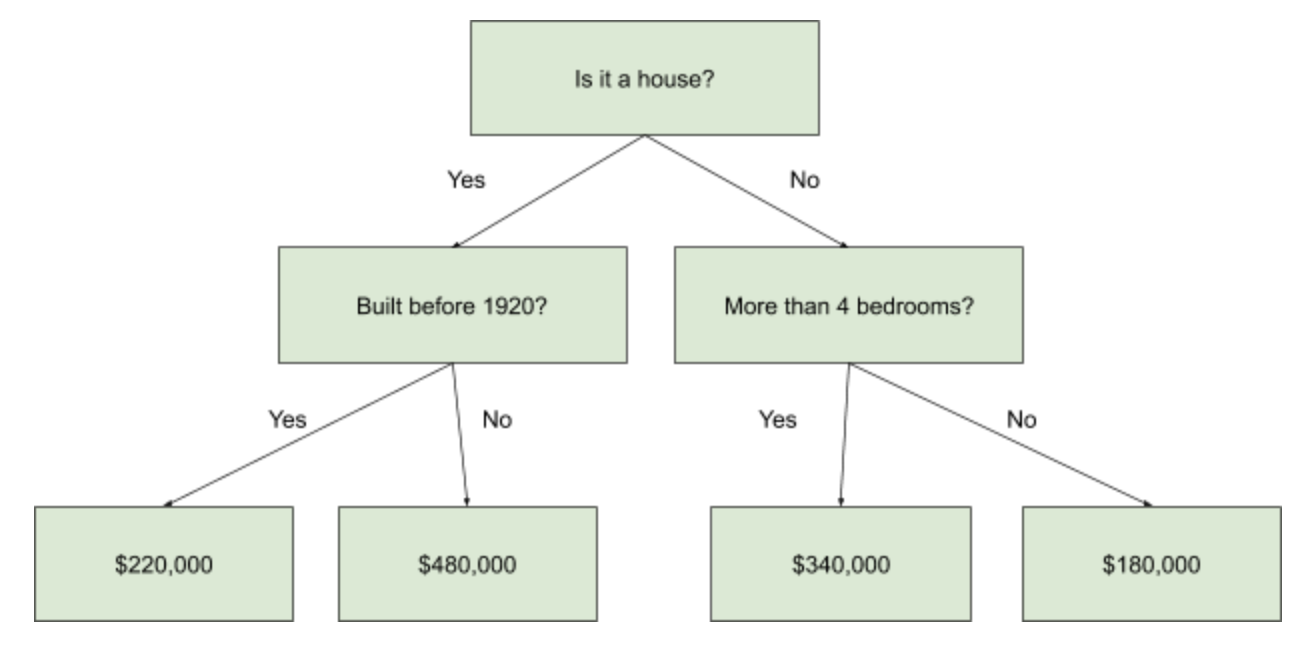



* This would also be a valid decision chart, but with totally different decision criteria.

* These decisions are just as well-founded and show you information that was absent in the first decision tree.

* Our random forest takes multiple (but different) regression decision trees and makes them ‘vote’.

* Each tree needs to predict the expected price of the real estate based on the decision criteria it picked. 

* Random forest regression then calculates the average of all of the predictions to generate a great estimate of what the expected price for a real estate should be.

* Similarly, in our project, the algorithm made predictions based off individual attributes of the data and gave a "grand average" of what the load shortfall would probably be at a given time. 


*Visuals courtesy of Keebola.com*

## Exporting results

In [ ]:
RF.fit(X_train,y_train)

RF_predict = RF.predict(X_test)

In [152]:
daf = pd.DataFrame(lm_pred_, columns = ['load_shortfall_3h'])
daf.tail()

,load_shortfall_3h
1748,7509.993476
1749,13657.009227
1750,13313.798314
1751,11683.455720
1752,11873.437086


In [129]:
output = pd.DataFrame({"time":test_df['time']})
submission = output.join(daf)
submission.to_csv('submission_final.csv', index=False)